Name: Aparna Iyer

PRN: 22070126017

Batch: 2022-2026

Branch: AI-ML A1

###**1. Title:**
Implementation of a Feed-Forward Neural Network for Iris Dataset (Without TensorFlow and Keras) and Titanic Dataset (With TensorFlow and Keras)

###**2. Objectives:**

1. Implement a feedforward neural network for the Iris dataset from scratch, without using TensorFlow and Keras.

2. Implement a feedforward neural network for the Titanic dataset using TensorFlow and Keras.

###**3. Theory:**
A feed-forward neural network (FNN) is the simplest type of artificial neural network in which data flows in one direction, from input to output, without loops. Each neuron in a layer is connected to every neuron in the next layer, and the network "learns" by adjusting its weights during the training process.

In this experiment:

The Iris dataset will be used to classify iris species based on features such as sepal and petal length/width. The network will be built from scratch, providing a deep understanding of each step, such as forward propagation, backpropagation, and weight updates.


The Titanic dataset will be used for a binary classification task (predicting survival). The neural network for this dataset will be implemented using TensorFlow and Keras, simplifying the process with higher-level abstractions for model building and training.

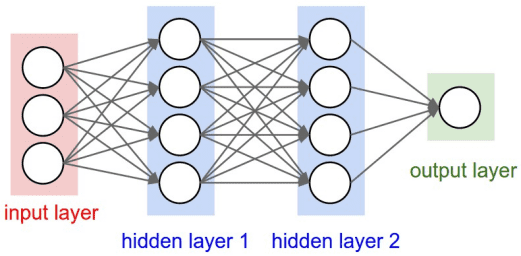

**A. Iris Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer


Mounted at /content/drive


In [ ]:
# Load the dataset
data = pd.read_csv('/content/IrisData.csv')

data.columns =['Sepal Length (cm)','Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)','Species']
print(data['Species'])

# Convert categorical target variable to numerical
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(data['Species'])

# Separate features and target
X = data.drop(columns=['Species'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Species, Length: 149, dtype: object


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer


# Load and preprocess data
data = pd.read_csv('/content/IrisData.csv')
data.columns =['Sepal Length (cm)','Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)','Species']
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(data['Species'])
X = data.drop(columns=['Species'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize network
def initialize_network(input_size, hidden_layers, output_size):
    np.random.seed(42)
    network = []
    layer_sizes = [input_size] + hidden_layers + [output_size]
    for i in range(len(layer_sizes) - 1):
        layer = {
            'weights': np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.1,
            'biases': np.zeros((1, layer_sizes[i + 1]))
        }
        network.append(layer)
    return network

input_size = X_train.shape[1]
hidden_layers = [8, 8]
output_size = y_train.shape[1]
network = initialize_network(input_size, hidden_layers, output_size)


In [ ]:
# Define activation functions

def sigmoid(x):
  return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
  return x * (1 - x)

# Forward propagation

def forward_propagation(network, inputs):
  activations = inputs
  for layer in network:
    z = np.dot(activations, layer['weights']) + layer['biases']
    activations = sigmoid(z)
    layer['activations'] = activations
  return activations


# Backward propagation
def backward_propagation(network, inputs, targets, learning_rate):
    forward_propagation(network, inputs)
    for i in reversed(range(len(network))):
        layer = network[i]
        if i == len(network) - 1:
            layer['delta'] = (layer['activations'] - targets) * sigmoid_derivative(layer['activations'])
        else:
            next_layer = network[i + 1]
            layer['delta'] = np.dot(next_layer['delta'], next_layer['weights'].T) * sigmoid_derivative(layer['activations'])
    for i in range(len(network)):
        layer = network[i]
        if i == 0:
            input_to_use = inputs
        else:
            input_to_use = network[i - 1]['activations']
        layer['weights'] -= learning_rate * np.dot(input_to_use.T, layer['delta'])
        layer['biases'] -= learning_rate * np.sum(layer['delta'], axis=0, keepdims=True)

In [ ]:
#Train the Network

def train_network(network, inputs, targets, learning_rate, epochs):
    for epoch in range(epochs):
        backward_propagation(network, inputs, targets, learning_rate)
        if (epoch + 1) % 100 == 0:
            loss = np.mean(np.square(targets - forward_propagation(network, inputs)))
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

train_network(network, X_train, y_train, learning_rate=0.01, epochs=1000) #Call the function to train the network


# Evaluate the network

def predict(network, inputs):
    outputs = forward_propagation(network, inputs)
    return outputs

predictions = predict(network, X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(predicted_classes == true_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(predictions)
print(predicted_classes)

Epoch 100/1000, Loss: 0.2221
Epoch 200/1000, Loss: 0.2218
Epoch 300/1000, Loss: 0.2194
Epoch 400/1000, Loss: 0.1496
Epoch 500/1000, Loss: 0.1106
Epoch 600/1000, Loss: 0.0997
Epoch 700/1000, Loss: 0.0824
Epoch 800/1000, Loss: 0.0483
Epoch 900/1000, Loss: 0.0248
Epoch 1000/1000, Loss: 0.0154
Accuracy: 90.00%
[[6.00344790e-02 8.57094024e-01 4.81857254e-02]
 [9.49831923e-01 1.07434936e-01 2.12952147e-04]
 [1.58311246e-03 7.56219409e-02 9.69446062e-01]
 [1.69038251e-01 8.28943702e-01 1.21199300e-02]
 [7.97051886e-03 4.03881475e-01 6.24905186e-01]
 [9.51882656e-01 1.04140395e-01 2.04237420e-04]
 [5.51181802e-02 8.44369229e-01 5.64118877e-02]
 [2.15796755e-03 1.05358644e-01 9.47010803e-01]
 [7.82541858e-02 8.73325190e-01 3.14806094e-02]
 [6.01849030e-03 3.17657854e-01 7.32301542e-01]
 [3.24548333e-03 1.64362740e-01 8.94719209e-01]
 [9.47604092e-01 1.11426013e-01 2.21129934e-04]
 [9.46425294e-01 1.13345780e-01 2.25960460e-04]
 [9.49892328e-01 1.07468948e-01 2.12357103e-04]
 [9.47052333e-01 1.1

**B. Titanic Dataset**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [ ]:
# Load the dataset
df_titanic = pd.read_csv('/content/train.csv')

In [ ]:
# Display column names to verify
print(df_titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
##Data Preprocessing

# Fill missing values
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

# Convert categorical columns to numerical
label_encoder = LabelEncoder()
df_titanic['Sex'] = label_encoder.fit_transform(df_titanic['Sex'])
df_titanic['Embarked'] = label_encoder.fit_transform(df_titanic['Embarked'])

<ipython-input-18-041c4905b061>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
<ipython-input-18-041c4905b061>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
# Separate features and target
X = df_titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin']) # Drop non-numeric or high-cardinality categorical columns
y = df_titanic['Survived']

# One hot encode the target variable

one_hot_encoder = OneHotEncoder(sparse_output=False) # Use sparse=False for compatibility
# Convert y to a NumPy array before reshaping
y = one_hot_encoder.fit_transform(y.values.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Build NN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
model = Sequential([
Dense(8, input_shape=(X_train.shape[1],), activation='relu'),
Dense(8, activation='relu'),
Dense(y_train.shape[1], activation='linear')
 ])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162 (648.00 B)

 Trainable params: 162 (648.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train
#Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=5, verbose=1)

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5263 - loss: 1.0161 - val_accuracy: 0.7063 - val_loss: 0.6780
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6596 - loss: 0.6744 - val_accuracy: 0.7133 - val_loss: 0.6508
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6730 - loss: 0.6012 - val_accuracy: 0.6993 - val_loss: 0.6486
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7196 - loss: 0.6468 - val_accuracy: 0.7343 - val_loss: 0.5226
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7334 - loss: 0.7554 - val_accuracy: 0.7622 - val_loss: 0.7028
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7471 - loss: 0.6129 - val_accuracy: 0.7832 - val_loss: 1.4598
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7623 - loss: 0.9991 - val_accuracy: 0.7902 - val_loss: 1.3551
Epoch 8/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7590 - loss: 0.8001 - val_accu

In [ ]:
#Evaluate
#Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5870 - loss: 0.6690 
Test Accuracy: 59.22%


###**4. Conclusion:**

This experiment provided hands-on experience in implementing feedforward neural networks both from scratch and using deep learning frameworks.

Building the neural network for the Iris dataset manually enhanced our understanding of forward propagation, backpropagation, and optimization techniques.

The Titanic dataset implementation using TensorFlow and Keras highlighted the convenience and efficiency of high-level libraries for complex tasks.

We got an Accuracy of 90.00% for the Iris Dataset (without TensorFlow or Keras), and a  Test Accuracy of 59.22% for the Titanic Dataset (with TensorFlow and Keras).

**Justifications for Results:**


A. 90.00% Accuracy (Iris Dataset):

The high accuracy stems from the simplicity and well-defined patterns of the dataset. The three classes in the Iris dataset are linearly separable, making it easier for even a basic feedforward neural network to achieve strong performance.

B. 59.22% Test Accuracy (Titanic Dataset):

The lower accuracy is due to the complexity of the Titanic dataset, which involves real-world, less predictable data. Factors like imbalanced classes, lack of advanced feature engineering, and more complex relationships between features and the target (survival) contribute to this result.

**Improvements:**


A. Iris Dataset: We can fine-tune hyperparameters, add regularization to avoid overfitting.

B. Titanic Dataset: We can perform more feature engineering, handle missing data, balance the dataset, and consider more complex models.

Together, these approaches offer a comprehensive view of neural networks in both theoretical and practical contexts.

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

In [ ]:
!pip install pypandoc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/DL_Lab_Experiment3_AparnaIyer.ipynb"